## Import libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import dataset

In [46]:
df = pd.read_csv("Position_Salaries.csv")

In [47]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [48]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [49]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [50]:
y = y.reshape(len(y), 1)

In [51]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc_x = StandardScaler()

In [54]:
x = sc_x.fit_transform(x)

In [55]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [56]:
sc_y = StandardScaler()

In [57]:
y = sc_y.fit_transform(y)

In [58]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Train SVR model on whole dataset

In [59]:
from sklearn.svm import SVR

In [60]:
regressor = SVR(kernel='rbf')

In [61]:
regressor.fit(x, y)

C:\Users\est_tiberio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting new results

In [67]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

In [69]:
print(y_pred)

[170370.0204065]


## Visualising SVR results

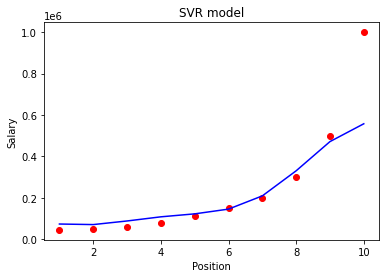

In [74]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title('SVR model')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## Visualising SVR results (higher resolution and smoother curve)

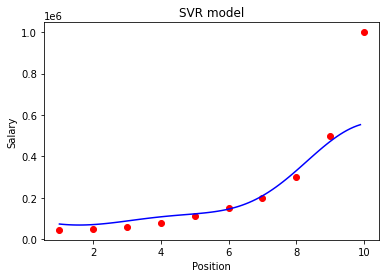

In [76]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color='blue')
plt.title('SVR model')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()